In [1]:
import pandas as pd

In [2]:
# Load data
covid_cases = pd.read_csv('covid_19_data.csv')

In [4]:
# Cleaning data
covid_cases.dropna(inplace=True)

In [8]:
# Display the first few rows
print(covid_cases.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [9]:
# Check data types
print(covid_cases.dtypes)

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [10]:
# Check for missing values
print(covid_cases.isnull().sum())

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [ ]:
# There are no missing values in the data.

In [11]:
# Compute basic statistics
print(covid_cases.describe())

                 SNo     Confirmed         Deaths     Recovered
count  228326.000000  2.283260e+05  228326.000000  2.283260e+05
mean   158732.777113  8.021381e+04    1961.373273  4.184345e+04
std     85862.065298  2.493661e+05    5871.937048  1.793670e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     85431.250000  1.225000e+03      15.000000  0.000000e+00
50%    159305.500000  1.175750e+04     234.000000  1.211000e+03
75%    232835.750000  4.841125e+04    1411.000000  1.660275e+04
max    306429.000000  5.713215e+06  112385.000000  6.399531e+06


In [12]:
import matplotlib.pyplot as plt

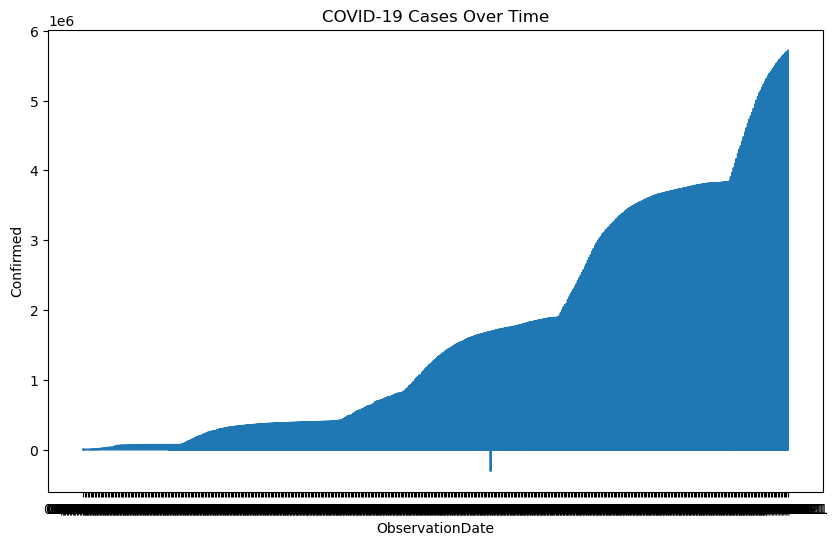

In [21]:
# Plot cases over time
plt.figure(figsize=(10,6))
plt.plot(covid_cases['ObservationDate'], covid_cases['Confirmed'])
plt.xlabel('ObservationDate')
plt.ylabel('Confirmed')
plt.title('COVID-19 Cases Over Time')
plt.show()

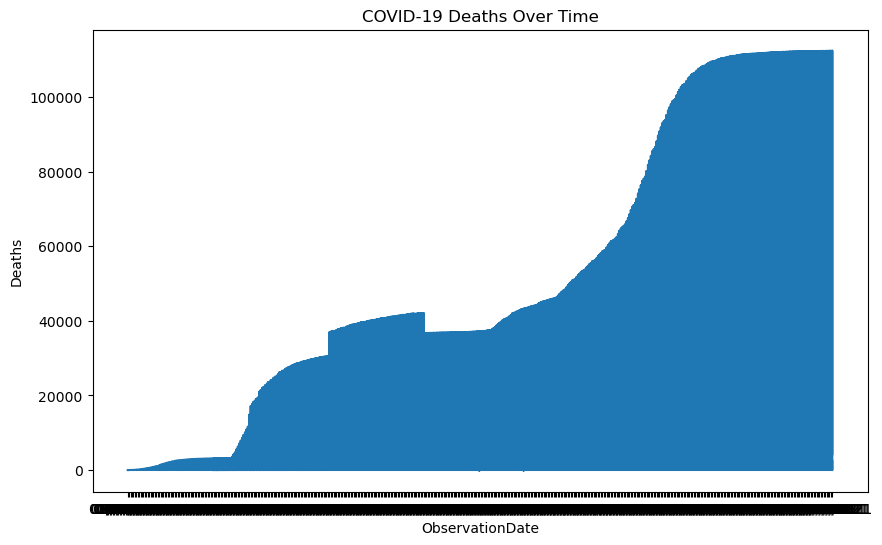

In [22]:
# Plot deaths over time
plt.figure(figsize=(10,6))
plt.plot(covid_cases['ObservationDate'], covid_cases['Deaths'])
plt.xlabel('ObservationDate')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths Over Time')
plt.show()

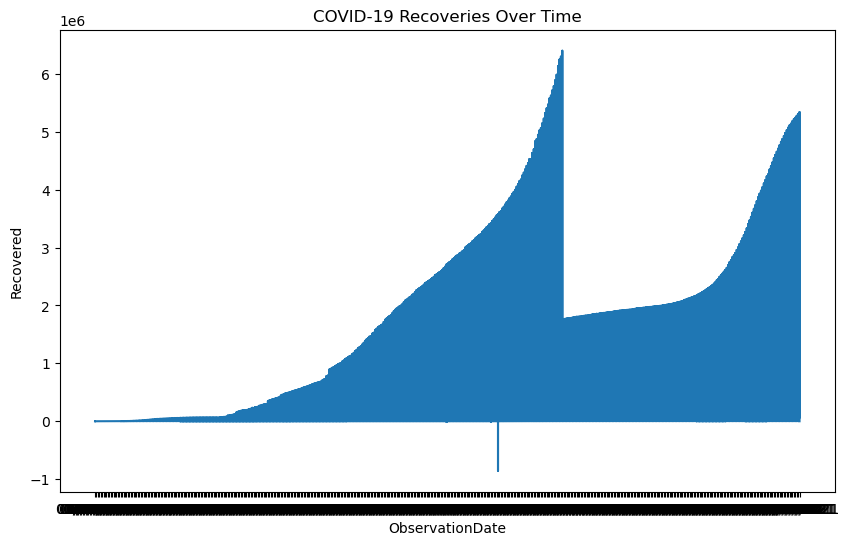

In [23]:
# Plot recoveries over time
plt.figure(figsize=(10,6))
plt.plot(covid_cases['ObservationDate'], covid_cases['Recovered'])
plt.xlabel('ObservationDate')
plt.ylabel('Recovered')
plt.title('COVID-19 Recoveries Over Time')
plt.show()

In [32]:
covid_cases['Country/Region'].value_counts()

Country/Region
Russia            30129
US                26740
Japan             17932
Mainland China    15758
India             13050
Colombia          12419
Mexico            12199
Brazil            10144
Ukraine            9801
Peru               9542
Italy              8001
Spain              7615
Sweden             7539
Canada             6960
UK                 6553
Germany            6481
Chile              6375
Netherlands        5864
France             4544
Australia          3785
Pakistan           2478
Belgium            2388
Denmark             893
Hong Kong           494
Macau               494
Taiwan               49
China                48
Others               46
Israel                5
Name: count, dtype: int64

In [43]:
print(covid_cases.info())

<class 'pandas.core.frame.DataFrame'>
Index: 228326 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              228326 non-null  int64  
 1   ObservationDate  228326 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   228326 non-null  object 
 4   Last Update      228326 non-null  object 
 5   Confirmed        228326 non-null  float64
 6   Deaths           228326 non-null  float64
 7   Recovered        228326 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.7+ MB
None


In [44]:
# Get the top 10 countries with the highest deaths
top_deaths = covid_cases.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
print(top_deaths)

Country/Region
US          123303762.0
Brazil       72339029.0
India        44256013.0
Mexico       42918161.0
UK           27316263.0
Italy        24852224.0
Russia       18271229.0
Spain        18124340.0
Colombia     13962927.0
Germany      13150115.0
Name: Deaths, dtype: float64


In [47]:
# Converting date column to date-time format
covid_cases['ObservationDate'] = pd.to_datetime(covid_cases['ObservationDate'])
print(covid_cases['ObservationDate'])

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
306424   2021-05-29
306425   2021-05-29
306426   2021-05-29
306427   2021-05-29
306428   2021-05-29
Name: ObservationDate, Length: 228326, dtype: datetime64[ns]


In [48]:
# Extracting month from date column
covid_cases['Month'] = covid_cases['ObservationDate'].dt.month
print(covid_cases['Month'])

0         1
1         1
2         1
3         1
4         1
         ..
306424    5
306425    5
306426    5
306427    5
306428    5
Name: Month, Length: 228326, dtype: int32


In [49]:
# Get the total deaths by month.
deaths_by_month = covid_cases.groupby('Month')['Deaths'].sum().reset_index()
print(deaths_by_month)

    Month      Deaths
0       1  44888620.0
1       2  48146066.0
2       3  59322582.0
3       4  64848158.0
4       5  73830925.0
5       6   9902940.0
6       7  14462754.0
7       8  18723183.0
8       9  21731624.0
9      10  25902410.0
10     11  29303477.0
11     12  36769775.0


In [63]:
# total deaths by month 
total_deaths_by_month = deaths_by_month.sum().sort_values(ascending=False)
print(total_deaths_by_month)

Deaths    447832514.0
Month            78.0
dtype: float64


In [64]:
top_deaths_by_month = deaths_by_month.head(10)
print(top_deaths_by_month)

   Month      Deaths
0      1  44888620.0
1      2  48146066.0
2      3  59322582.0
3      4  64848158.0
4      5  73830925.0
5      6   9902940.0
6      7  14462754.0
7      8  18723183.0
8      9  21731624.0
9     10  25902410.0


In [65]:
# Deaths by month in descending order
import calendar

deaths_by_month = covid_cases.groupby(covid_cases['ObservationDate'].dt.month)['Deaths'].sum().reset_index()
deaths_by_month['Month'] = deaths_by_month['ObservationDate'].apply(lambda x: calendar.month_name[x])
deaths_by_month = deaths_by_month.sort_values(by='Deaths', ascending=False)
top_deaths_by_month = deaths_by_month.head(10)
print(top_deaths_by_month)

    ObservationDate      Deaths      Month
4                 5  73830925.0        May
3                 4  64848158.0      April
2                 3  59322582.0      March
1                 2  48146066.0   February
0                 1  44888620.0    January
11               12  36769775.0   December
10               11  29303477.0   November
9                10  25902410.0    October
8                 9  21731624.0  September
7                 8  18723183.0     August


In [74]:
import matplotlib.pyplot as plt

In [80]:
# Get top 5 countries with highest confirmed cases
top_confirmed = covid_cases.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_confirmed)

  Country/Region     Confirmed
0             US  6.049146e+09
1          India  3.221090e+09
2         Brazil  2.649295e+09
3         Russia  9.211500e+08
4             UK  7.705376e+08


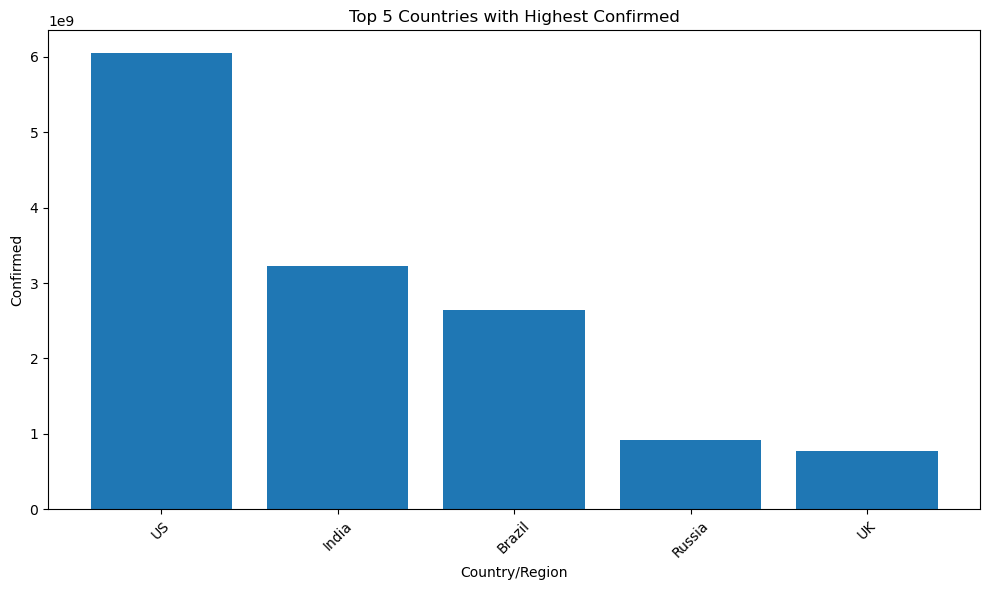

In [82]:
plt.figure(figsize=(10,6))
plt.bar(top_confirmed['Country/Region'], top_confirmed['Confirmed'])
plt.xlabel('Country/Region')
plt.ylabel('Confirmed')
plt.title('Top 5 Countries with Highest Confirmed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area
plt.show()

In [76]:
# Get top 5 countries with highest deaths
top_deaths = covid_cases.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(5).reset_index()
print(top_deaths)

  Country/Region       Deaths
0             US  123303762.0
1         Brazil   72339029.0
2          India   44256013.0
3         Mexico   42918161.0
4             UK   27316263.0


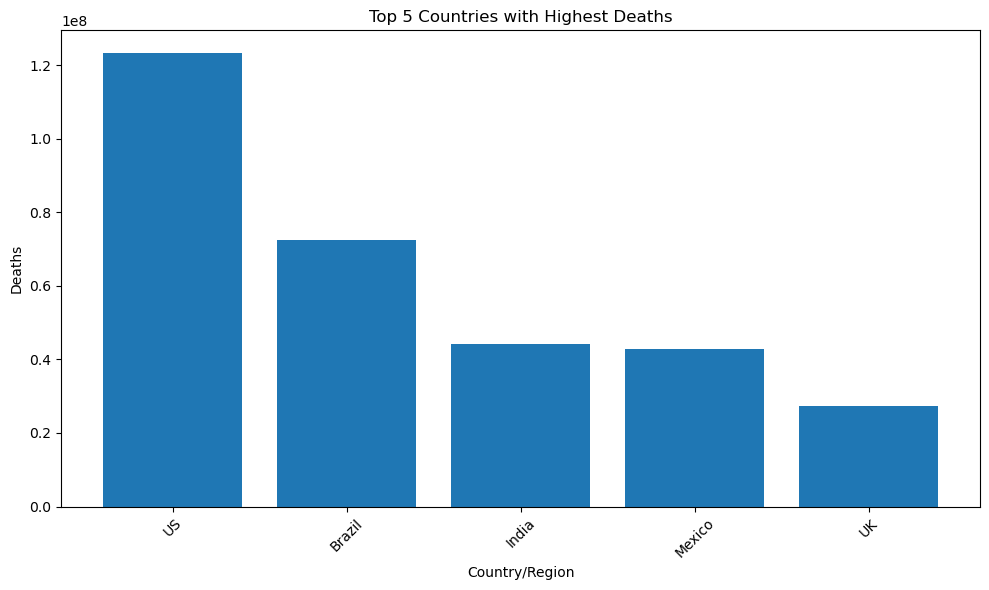

In [77]:
# Plot chart of the top 5 countries with the highest death rates
plt.figure(figsize=(10,6))
plt.bar(top_deaths['Country/Region'], top_deaths['Deaths'])
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.title('Top 5 Countries with Highest Deaths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area
plt.show()